In [1]:
import collections

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from powerlaw import *

from scipy import stats
import seaborn as sns

C:\Users\sshepherd\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


---
# Part 0

In [2]:
# parse the "blog.txt" into graph
edges = pd.read_csv('blog.txt').iloc[:,0].apply(lambda x: x.split()).tolist()
print(len(edges))

g = nx.DiGraph()
g.add_edges_from(edges)
print(g.is_directed(), g.number_of_nodes(), g.number_of_edges())

19024
True 1224 19024


---
# Part 1

#### Degree summary function

In [3]:
def get_degree_probs(degrees):
    degree_results = {}
    degree_vals = [s[1] for s in dict(degrees).items()]
    for d in degree_vals:
        if d not in degree_results.keys():
            degree_results[d] = 1
        else:
            degree_results[d] += 1

    dist = pd.DataFrame.from_records(list(degree_results.items()), columns=['k','n']).sort_values(by='k')
    dist = dist[dist.k > 0]
    dist['p'] = dist.n / dist.n.sum()
    
    dist['log(k)'] = np.log(dist.k)
    dist['log(p)'] = np.log(dist.p)
    dist['p_pct'] = dist.p.rank(pct=True, ascending=False)
    dist['k_pct'] = dist.k.rank(pct=True, ascending=False)
    #dist['p_pct_bin'] = np.round(dist.p_pct, 1)
    #dist['k_pct_bin'] = np.round(dist.k_pct, 1)
    dist['p_pct_bin'] = pd.cut(dist.p_pct, bins=np.linspace(0,1, num=20))
    dist['k_pct_bin'] = pd.cut(dist.k_pct, bins=np.linspace(0,1, num=20))
    dist['cumulative_log_p'] = np.log(dist.p[::-1].cumsum()[::-1])
    
    return dist

## out-degree distribution

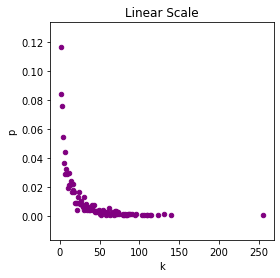

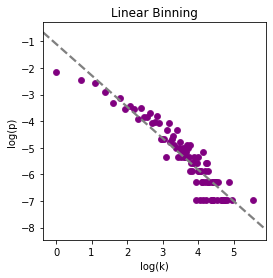

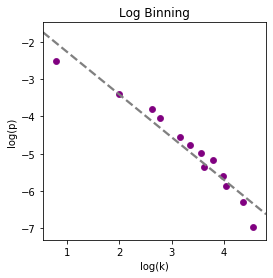

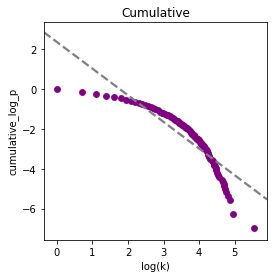

In [4]:
# Plot the out-degree distribution
degrees = g.out_degree()
dist = get_degree_probs(degrees)

## Linear Scale
(
    dist
    .plot(kind='scatter', x='k', y='p', color='purple', figsize=(4,4), title='Linear Scale')
)

## Linear Binning
(
    dist
    .plot(kind='scatter', x='log(k)', y='log(p)', color='purple', figsize=(4,4), title='Linear Binning')
)
sns.regplot(x=dist['log(k)'], y=dist['log(p)'], line_kws={'color':'gray','linestyle':'dashed'}, ci=None, color='purple')

## Log Binning
grouped = (
    dist
    .groupby('p_pct_bin')
    .agg({'log(p)':'mean','log(k)':'mean'})
)
grouped.plot(kind='scatter', x='log(k)', y='log(p)', color='purple', figsize=(4,4), title='Log Binning', loglog=False)
sns.regplot(x=grouped['log(k)'], y=grouped['log(p)'], line_kws={'color':'gray','linestyle':'dashed'}, ci=None, color='purple')

## Cumulative
(
    dist
    .plot(kind='scatter', x='log(k)', y='cumulative_log_p', color='purple', figsize=(4,4), title='Cumulative')
)
sns.regplot(x=dist['log(k)'], y=dist['cumulative_log_p'], line_kws={'color':'gray','linestyle':'dashed'}, ci=None, color='purple')

### fitting without xmax

In [5]:
#fit the out-degree distributon without xmax
degrees = [s[1] for s in dict(g.out_degree()).items() if s[1] != 0]

print('Without XMax')
pl = powerlaw.Fit(degrees, discrete=True)
print('alpha:', pl.alpha)
print('xmin :', pl.xmin)

Without XMax
alpha: 5.28651205623829
xmin : 79.0


Calculating best minimal value for power law fit
C:\Users\sshepherd\01GT\gt_omscs\NetworkScience\Assignments\Assignment2\powerlaw\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


### fitting wit xmax

In [6]:
#fit the out-degree distributon with xmax = 200
print('\nWith XMax')
pl = powerlaw.Fit(degrees, discrete=True, xmax=200)
print('alpha:', pl.alpha)
print('xmin :', pl.xmin)


With XMax


Calculating best minimal value for power law fit


alpha: 2.90106495528127
xmin : 35.0


C:\Users\sshepherd\01GT\gt_omscs\NetworkScience\Assignments\Assignment2\powerlaw\powerlaw.py:1185: RuntimeWarning: divide by zero encountered in double_scalars
  C = 1.0/C
C:\Users\sshepherd\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:596: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
C:\Users\sshepherd\01GT\gt_omscs\NetworkScience\Assignments\Assignment2\powerlaw\powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


## in-degree distribution

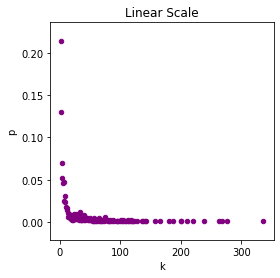

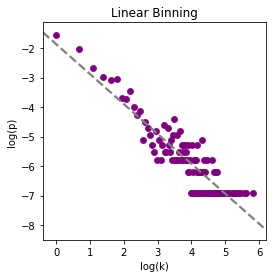

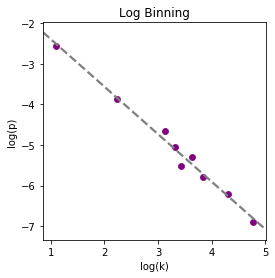

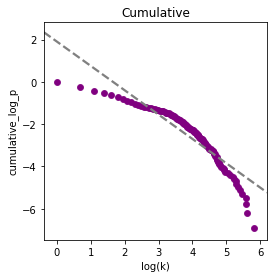

In [7]:
# Plot the in-degree distribution
degrees = g.in_degree()
dist = get_degree_probs(degrees)

## Linear Scale
(
    dist
    .plot(kind='scatter', x='k', y='p', color='purple', figsize=(4,4), title='Linear Scale')
)

## Linear Binning
(
    dist
    .plot(kind='scatter', x='log(k)', y='log(p)', color='purple', figsize=(4,4), title='Linear Binning')
)
sns.regplot(x=dist['log(k)'], y=dist['log(p)'], line_kws={'color':'gray','linestyle':'dashed'}, ci=None, color='purple')

## Log Binning
grouped = (
    dist
    .groupby('p_pct_bin')
    .agg({'log(p)':'mean','log(k)':'mean'})
)
grouped.plot(kind='scatter', x='log(k)', y='log(p)', color='purple', figsize=(4,4), title='Log Binning', loglog=False)
sns.regplot(x=grouped['log(k)'], y=grouped['log(p)'], line_kws={'color':'gray','linestyle':'dashed'}, ci=None, color='purple')

## Cumulative
(
    dist
    .plot(kind='scatter', x='log(k)', y='cumulative_log_p', color='purple', figsize=(4,4), title='Cumulative')
)
sns.regplot(x=dist['log(k)'], y=dist['cumulative_log_p'], line_kws={'color':'gray','linestyle':'dashed'}, ci=None, color='purple')

### fitting without xmax

In [8]:
# Fit the in-degree distributon without xmax
degrees = [s[1] for s in dict(g.in_degree()).items() if s[1] != 0]

print('Without XMax')
pl = powerlaw.Fit(degrees, discrete=True)
print('alpha:', pl.alpha)
print('xmin :', pl.xmin)

Without XMax
alpha: 3.075899266109163
xmin : 61.0


Calculating best minimal value for power law fit


### fitting with xmax

In [9]:
# Fit the in-degree distributon with xmax = 300
print('\nWith XMax')
pl = powerlaw.Fit(degrees, discrete=True, xmax=300)
print('alpha:', pl.alpha)
print('xmin :', pl.xmin)


With XMax


Calculating best minimal value for power law fit


alpha: 2.192146059405874
xmin : 31.0


---
# Part 2

## Q1

In [10]:
# Compute the Pearson correlation coefficieient
g = g.to_undirected()

print(g.is_directed(), g.number_of_nodes(), g.number_of_edges())

neighboring_degrees = list(nx.assortativity.node_degree_xy(g))

pearson, pval = stats.pearsonr([i[0] for i in neighboring_degrees], [i[1] for i in neighboring_degrees])

print('pearsonr:', pearson, 'p-value', pval)

False 1224 16717
pearsonr: -0.22116708426184284 p-value 0.0


##### Based on the result, do you think this network is assortative, disassortative or neutral? write 1-2 sentence(s) to state your conclusion and reasons.

- I think this network is Disassortative.  Since the Pearson Correlation Coefficient of the degrees of neighboring nodes is neagative with a small p-value (0.0), this means that higher degree nodes tend to have neighbors of lower degree and this is the definition of Disassortative.

## Q2

pearsonr: -0.8312431945822473 p-value 4.948620301079834e-38


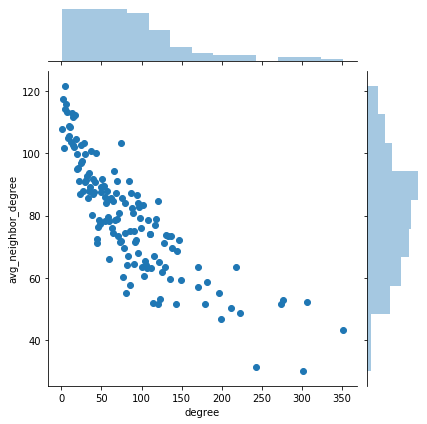

In [11]:
# Plot the average neighbor degree as a function of the node degree k

deg_con_df = (
    pd.DataFrame(nx.average_degree_connectivity(g).items(), columns=['degree','avg_neighbor_degree'])
    .sort_values(by='degree')
)
sns.jointplot(x=deg_con_df.degree, y=deg_con_df.avg_neighbor_degree)

deg_con = list(nx.average_degree_connectivity(g).items())
pearson, pval =  stats.pearsonr([i[0] for i in deg_con], [i[1] for i in deg_con])
print('pearsonr:', pearson, 'p-value', pval)

##### Based on the result, do you think this network is assortative, disassortative or neutral? write 1-2 sentence(s) to state your conclusion and reasons.

- I think this network is Disassortative.  Since the Pearson Correlation Coefficient of the average degree of neighbors of nodes for a given degree is negative with a small p-value, this means that higher degree nodes tend to have neighbors of lower degree and this is the definition of Disassortative.

---
# Part 3

## Q1

#### Get graph from Q1, convert to UnDirected

In [12]:
# parse the "blog.txt" into graph
edges = pd.read_csv('blog.txt').iloc[:,0].apply(lambda x: x.split()).tolist()
print(len(edges))

g = nx.DiGraph()
g.add_edges_from(edges)

lcc = sorted(list(nx.strongly_connected_components(g)), key=len, reverse=True)[0]
g0 = g.subgraph(lcc).to_undirected()

print(g0.is_directed(), g0.number_of_nodes(), g0.number_of_edges())

19024
False 793 13485


#### Generate 100 random G(n,p) graphs

In [13]:
## Get n and p values
n = g0.number_of_nodes()
avg_degree = np.mean([i[1] for i in g0.degree])
p = avg_degree / (g0.number_of_nodes() - 1)
print('avg degree',avg_degree, 'n:',n, 'p:',p)

## Generate 100 random G(n,p) graphs
print(f'generating 100 random graphs of G({n},{p})')
rand_graphs = []
for i in range(100):
    gnp = nx.gnp_random_graph(n, p, seed=np.random.randint(0,100))
    rand_graphs.append(gnp)
print('...done\n')

avg degree 34.010088272383356 n: 793 p: 0.04294203064694868
generating 100 random graphs of G(793,0.04294203064694868)
...done



#### Diameter calculations

In [14]:
g0_diam = nx.distance_measures.diameter(g0)
print('g0 diameter:', g0_diam)

print("calculating random graphs' diameters...")
rand_graphs_diameters = []
for i in range(len(rand_graphs)):
#for i in range(10):
    rg = rand_graphs[i]
    gnp_diam = nx.distance_measures.diameter(rg)
    #if i == 0 or i % 10 == 0:
        #print('on rand graph:', i, 'diameter:', gnp_diam)
    rand_graphs_diameters.append(gnp_diam)
print('...done')

print('diameters:')
print(np.mean(rand_graphs_diameters))
print(rand_graphs_diameters)

g0 diameter: 5
calculating random graphs' diameters...
...done
diameters:
3.0
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


#### Diameter plots

C:\Users\sshepherd\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


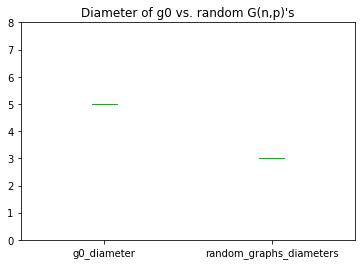

In [15]:
# Plot the diameters of the LCC and the 100 G(n,p) networks

pd.DataFrame.from_records(data={
    'g0_diameter': [g0_diam] + [None for i in range(len(rand_graphs_diameters) - 1)],
    'random_graphs_diameters': rand_graphs_diameters
}).plot(kind='box', ylim=[0,8], title="Diameter of g0 vs. random G(n,p)'s")

## Q2

#### Avg Shortest Path Length calculations

In [16]:
g0_spl = nx.average_shortest_path_length(g0)
print('g0 avg shortest path length:', g0_spl)

print("calculating random graphs' avg shortest path lengths...")
rand_graphs_spls = []
for i in range(len(rand_graphs)):
#for i in range(10):
    rg = rand_graphs[i]
    gnp_spl = nx.average_shortest_path_length(rg)
    #if i == 0 or i % 10 == 0:
        #print('on rand graph:', i, 'diameter:', gnp_diam)
    rand_graphs_spls.append(gnp_spl)
print('...done')

print('avg shortest path lengths:')
print(np.mean(rand_graphs_spls))
print(rand_graphs_spls)

g0 avg shortest path length: 2.4236055383596367
calculating random graphs' avg shortest path lengths...
...done
avg shortest path lengths:
2.178564045244373
[2.1796177410931508, 2.172678869400181, 2.179907524169819, 2.1783025717451947, 2.184349803202262, 2.1877571426751756, 2.1810316277529394, 2.1871552855159413, 2.184512209102373, 2.1883112333932004, 2.1810316277529394, 2.1660234119250514, 2.176299565643828, 2.1731023985122344, 2.1787229164278346, 2.180318315564217, 2.169609079445145, 2.1763887296674183, 2.1883176022520283, 2.1723476887411315, 2.169347956233202, 2.1853146853146854, 2.1848847873438038, 2.168443578279644, 2.1741309692129365, 2.182270370794961, 2.1775892595564725, 2.179442597475384, 2.1814233125708538, 2.1857095545620138, 2.172869935165017, 2.173681964665571, 2.1809838613117303, 2.1935878329320952, 2.1815666118944805, 2.1732456978358616, 2.1845376845376845, 2.174095940489383, 2.173589616212567, 2.1813437018355053, 2.1810284433235254, 2.187900441998803, 2.1660234119250514

C:\Users\sshepherd\AppData\Roaming\Python\Python37\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


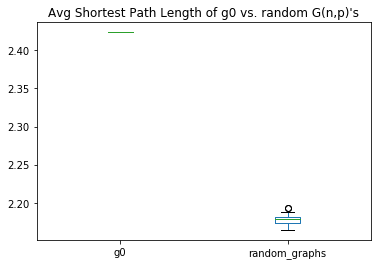

In [17]:
# Plot the average shortest path length of the LCC and the 100 G(n,p) networks

pd.DataFrame.from_records(data={
    'g0': [g0_spl] + [None for i in range(len(rand_graphs_spls) - 1)],
    'random_graphs': rand_graphs_spls
}).plot(kind='box', title="Avg Shortest Path Length of g0 vs. random G(n,p)'s")

## Q3

Use the one-sample t-test to examine if the diameter of the undirected network is significantly different than the diameter of the random networks at a 95% significance level? What about the average shortest path length?

In [18]:
print("one sample t-test for diameter:")
diam_ttest = stats.ttest_1samp(rand_graphs_diameters, g0_diam)
print(diam_ttest.statistic, diam_ttest.pvalue)

print("\none sample t-test for avg shortest path length:")
spl_ttest = stats.ttest_1samp(rand_graphs_spls, g0_spl)
print(spl_ttest.statistic, spl_ttest.pvalue)

one sample t-test for diameter:
-inf 0.0

one sample t-test for avg shortest path length:
-402.450587207013 6.41826854659074e-161


- It appears that the diameter and avg shortest path length of g0 are both significantly different than the corresponding values for the randomly generated G(n,p) networks.

---
# Part 4

## Q1

#### C-CDF of clustering coefficient for g0

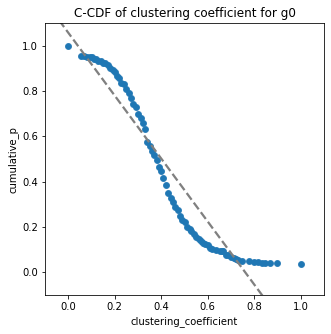

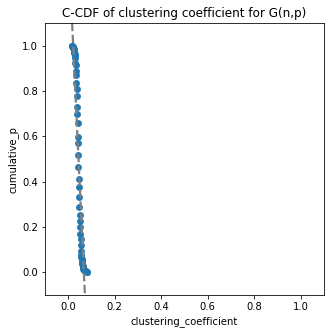

In [19]:
# Plot the clustering coefficient of the LCC and a G(n,p) network in CCDF format

## visualize
ccs = pd.DataFrame(data={'cc':[i[1] for i in nx.clustering(g0).items()]})
ccs = (
    ccs
    .groupby(np.round(ccs.cc, 2))
    .agg({'cc':['mean','count']})
    .droplevel(0, axis=1)
    .rename(columns={'mean':'clustering_coefficient','count':'p'})
)
ccs.p = ccs.p / ccs.p.sum()
ccs['cumulative_p'] = ccs.p[::-1].cumsum()[::-1]

## C-CDF plot
(
    ccs
    .plot(
        kind='scatter', x='clustering_coefficient', y='cumulative_p', figsize=(5,5),
        title='C-CDF of clustering coefficient for g0', ylim=(-.1, 1.1), xlim=(-.1, 1.1)
    )
)
sns.regplot(x=ccs['clustering_coefficient'], y=ccs['cumulative_p'], line_kws={'color':'gray','linestyle':'dashed'}, ci=None)

# Plot the clustering coefficient of the LCC and a G(n,p) network in CCDF format

## Get n and p values for G(n,p)
n = g0.number_of_nodes()
avg_degree = np.mean([i[1] for i in g0.degree])
p = avg_degree / (g0.number_of_nodes() - 1)

gnp = nx.gnp_random_graph(n, p, seed=np.random.randint(0,100))

## visualize
ccs = pd.DataFrame(data={'cc':[i[1] for i in nx.clustering(gnp).items()]})
ccs = (
    ccs
    .groupby(np.round(ccs.cc, 3))
    .agg({'cc':['mean','count']})
    .droplevel(0, axis=1)
    .rename(columns={'mean':'clustering_coefficient','count':'p'})
)
ccs.p = ccs.p / ccs.p.sum()
ccs['cumulative_p'] = ccs.p[::-1].cumsum()[::-1]

## C-CDF plot
(
    ccs
    .plot(
        kind='scatter', x='clustering_coefficient', y='cumulative_p', figsize=(5,5),
        title='C-CDF of clustering coefficient for G(n,p)', ylim=(-.1, 1.1), xlim=(-.1, 1.1)
    )
)
sns.regplot(x=ccs['clustering_coefficient'], y=ccs['cumulative_p'], line_kws={'color':'gray','linestyle':'dashed'}, ci=None)

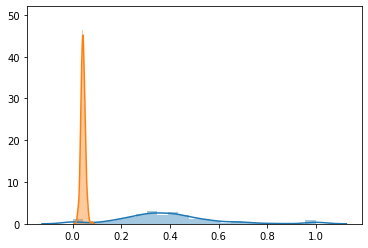

In [20]:
sns.distplot([i[1] for i in nx.clustering(g0).items()])
sns.distplot([i[1] for i in nx.clustering(gnp).items()])

Are the two distributions significantly different?

In [21]:
stats.ks_2samp(
    data1=[i[1] for i in nx.clustering(g0).items()],
    data2=[i[1] for i in nx.clustering(gnp).items()]
)

Ks_2sampResult(statistic=0.9508196721311475, pvalue=0.0)

- With a p-value from the Kolmogorov-Smirnov test of 0, we can conclude that the two distributions are significantly different.

## Q2

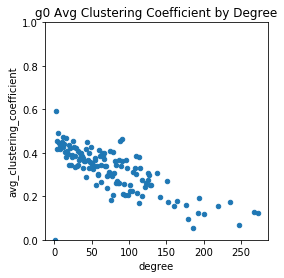

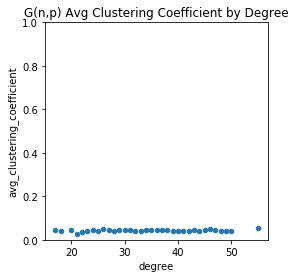

In [22]:
# Plot the average clustering coefficient as a function of the node degree

cc = nx.clustering(g0)
dg = nx.degree(g0)

g0_avg_cc = (
    pd.DataFrame([(dg[n],cc[n]) for n in g0.nodes()], columns=['degree','cc'])
    .groupby('degree')
    .agg({'cc':'mean'})
    .reset_index()
    .rename(columns={'cc':'avg_clustering_coefficient'})
    .plot(kind='scatter', x='degree', y='avg_clustering_coefficient',
          title='g0 Avg Clustering Coefficient by Degree', figsize=[4,4], ylim=[0,1])
)

cc = nx.clustering(gnp)
dg = nx.degree(gnp)

gnp_avg_cc = (
    pd.DataFrame([(dg[n],cc[n]) for n in gnp.nodes()], columns=['degree','cc'])
    .groupby('degree')
    .agg({'cc':'mean'})
    .reset_index()
    .rename(columns={'cc':'avg_clustering_coefficient'})
    .plot(kind='scatter', x='degree', y='avg_clustering_coefficient',
          title='G(n,p) Avg Clustering Coefficient by Degree', figsize=[4,4], ylim=[0,1])
)

What do you observe based on the above visualization?

- The G0 graph has a negative correlation between degree and avg clustering coefficient, whereas G(n,p) graphs are fairly uniform around a much lower clustering coefficient.

## Q3

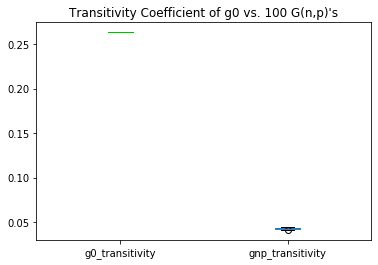

In [23]:
# Plot the transitivity coefficient of the overall network of the LCC and the 100 G(n,p) networks

g0_trans = nx.transitivity(g0)
rg_trans = [nx.transitivity(rg) for rg in rand_graphs]

(
    pd.DataFrame(zip([g0_trans for i in range(len(rg_trans))], rg_trans), columns=['g0_transitivity','gnp_transitivity'])
    .plot(kind='box', title="Transitivity Coefficient of g0 vs. 100 G(n,p)'s")
)

## Q4

Combining the results of Part-3 and Part-4, can we conclude that the undirected LCC of Part-1 network is a small-world network or not? Please provide with your reasons.

- No, we cannot conclude that g0 is a small-world network.
- Although it shows stronger clustering than the G(n,p) graphs, it has longer path lengths than the G(n,p) as we observed a diameter of 5 for g0 vs ~3 for G(n,p) and CPL of ~2.45 for g0 vs. ~2.2 G(n,p).  We would not expect longer path lengths from a small-world network, even if it does have strong clustering.

---
# Part 5

#### Create g1

In [24]:
# parse the "blog.txt" into graph
edges = pd.read_csv('blog.txt').iloc[:,0].apply(lambda x: x.split()).tolist()
print(len(edges))

g = nx.DiGraph()
g.add_edges_from(edges)

lcc = sorted(list(nx.strongly_connected_components(g)), key=len, reverse=True)[0]
g1 = g.subgraph(lcc)#.to_undirected()

print(g1.is_directed(), g1.number_of_nodes(), g1.number_of_edges())

19024
True 793 15782


#### Motif counting

In [25]:
census = nx.triadic_census(g1)
print(census)
print('')
g1_type_5_count = census['021U']
g1_type_9_count = census['030T']
print('type-5 feed-forward   count:', g1_type_5_count)
print('type-9 directed cycle count:', g1_type_9_count)

{'003': 73050041, '012': 7419205, '102': 1501166, '021D': 114654, '021U': 315347, '021C': 95874, '111D': 101902, '111U': 75737, '030T': 39719, '030C': 481, '201': 36716, '120D': 15237, '120U': 14638, '120C': 4199, '210': 10784, '300': 3016}

type-5 feed-forward   count: 315347
type-9 directed cycle count: 39719


#### Comparison to 10 generated graphs

In [26]:
din  = list(d for n, d in g1.in_degree())
dout = list(d for n, d in g1.out_degree())

type_5_counts = []
type_9_counts = []

for i in range(10):
    dcmg = nx.directed_configuration_model(din, dout)
    dcmg = nx.DiGraph( nx.directed_configuration_model(din, dout) )
    dcmg.remove_edges_from(nx.selfloop_edges(dcmg))
    census = nx.triadic_census(dcmg)
    type_5_counts.append(census['021U'])
    type_9_counts.append(census['030T'])
    
print(type_5_counts)
print(type_9_counts)

[333926, 324832, 328769, 324454, 323037, 324687, 327813, 324984, 327658, 328463]
[40681, 39455, 40191, 40045, 39321, 39618, 40713, 40312, 40381, 40221]


In [27]:
print('Type 5 count t-test:')
print(stats.ttest_1samp(type_5_counts, g1_type_5_count))

print('\nType 9 count t-test:')
print(stats.ttest_1samp(type_9_counts, g1_type_9_count))

Type 5 count t-test:
Ttest_1sampResult(statistic=11.486907539262798, pvalue=1.1162450174069431e-06)

Type 9 count t-test:
Ttest_1sampResult(statistic=2.443200622463665, pvalue=0.03716898387161072)


Which of the previous triplet types are statistically more common (or less common) in the network of the LCC compared to what we would expense based on chance?

- The Type 5 (feed-forward-loop) is statistically more common in g1 than what we would expect based on chance
- The Type 9 (directed cycle) is on the edge - with a p-value of .037 it is questionable whether it is statistically more common.

---
# Part 6

Note that the Transitivity and the Average Clustering Coefficient are two different metrics. They may often be close but there are also some extreme cases in which the two metrics give very different answers. To see that consider a network in which two nodes A and B are connected to each other as well as to every other node. There are no other links. The total number of nodes is n. What would be the transitivity and average clustering coefficient in this case (you can simplify by assuming that n is quite large)?

In [28]:
## generate the graph for increasing n's and calculate the two metrics to see if they approach limit
print('n','trans','avg clust', sep='\t')
for n in [10,100,1000,10000]:
    sg = nx.star_graph(n)
    new_centroid = n + 1
    for e in list(sg.edges()):
        sg.add_edge(new_centroid, e[1])
    sg.add_edge(0,new_centroid)
    print(n, np.round(nx.transitivity(sg), 4), np.round(nx.average_clustering(sg), 4), sep='\t')

n	trans	avg clust
10	0.25	0.8636
100	0.0294	0.9808
1000	0.003	0.998
10000	0.0003	0.9998


- The Transitivity for this graph approcahes 0 while the Avg Clustering Coefficient approaches 1 as n increases

- Also, from the textbook:

"Note that the average clustering coefficient ‹C› defined in (2.16) and the global clustering coefficient (2.17) are not equivalent. Indeed, take a network that is a double star, consisting of N nodes, where nodes 1 and 2 are joined to each other and to all other nodes, and there are no other links. Then the local clustering coefficient Ci is 1 for i ≥ 3 and 2/(N − 1) for i = 1, 2. It follows that the average clustering coefficient of the network is ‹C› = 1−O(1), while the global clustering coefficient is CΔ ~ 1/N."

---
# END

### Output python requirements

In [30]:
! conda list -e > requirements.txt